In [9]:
import torch
import numpy as np
import matplotlib.pylab as plt
from IPython.display import clear_output
import torch.nn as nn 

import net2net
import pipeline
import consts
from importlib import reload
import plot
import json
reload(plot)

plot.prepare_for_plots()

<Figure size 864x720 with 0 Axes>

In [17]:
train_dataloader, test_dataloader = pipeline.get_data()

# Net2Net:  distilling from full-training teacher

In [35]:
## reload(net2net)
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
mask = torch.ones(10).to(consts.device)
for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)
    teacher = pipeline.make_teacher_model()
    teacher.load_state_dict(torch.load(pipeline.get_path()+f'/teacher_{i}.pt'))
    model = net2net.net2net_antidistil(teacher)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=consts.full_student_learning_rate)
    
    for epoch in range(consts.full_student_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model,  history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)
    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/n2n_full_{i}.pt')

Model 1
-------------------------------
-------------------------------
inp 785
t hid 129
s hid 257
out_num 65
inp 257
t hid 65
s hid 129
out_num 33
inp 129
t hid 33
s hid 65
out_num 11
Epoch 1
-------------------------------


Validation accuracy: 53.0%, Validation loss: 1.210976 

Epoch 2
-------------------------------


KeyboardInterrupt: 

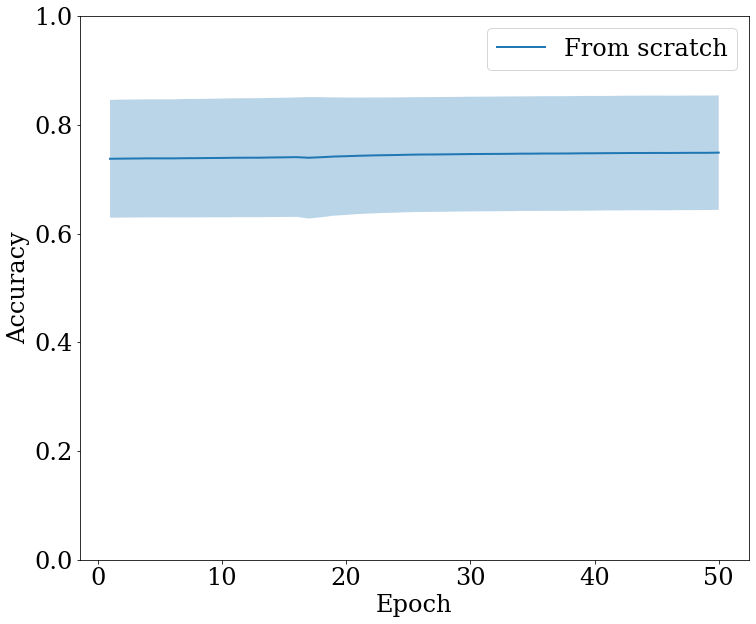

In [19]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.full_student_training_epochs+1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

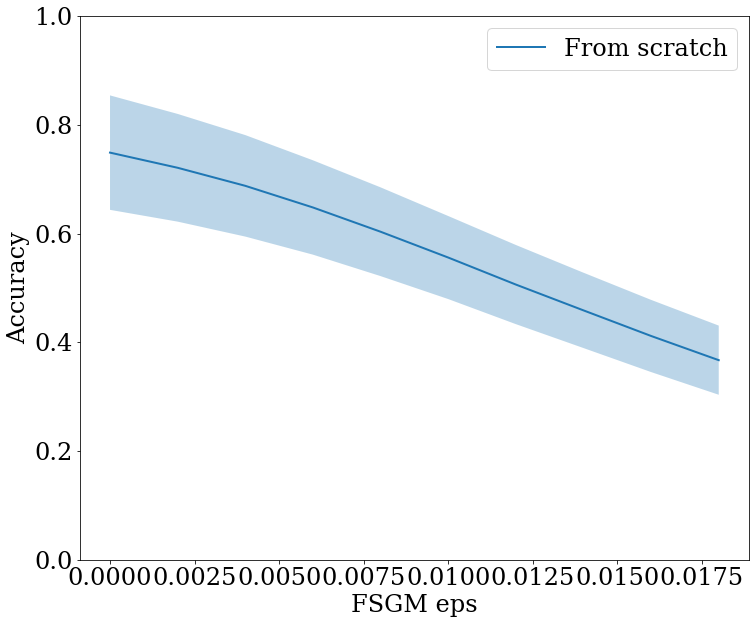

In [26]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

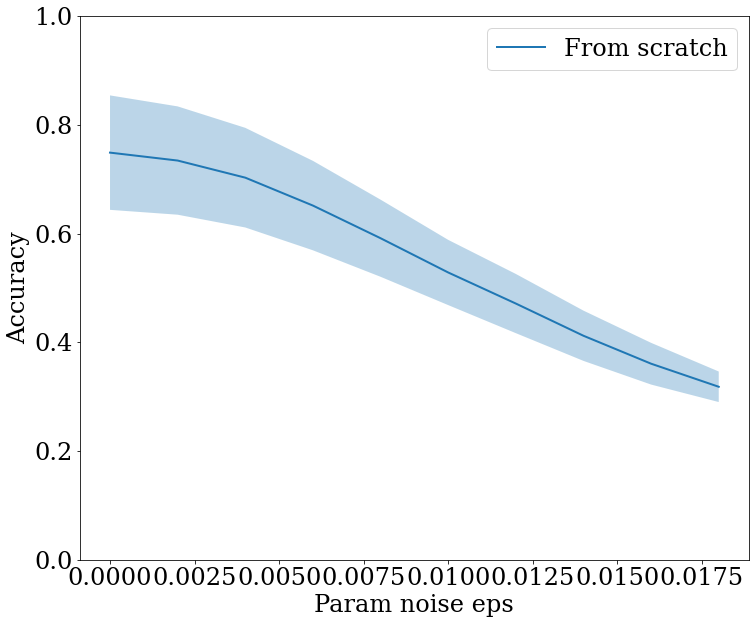

In [27]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [28]:
with open(pipeline.get_path()+'/history_full_n2n.json', 'w') as out:
    out.write(json.dumps(history))

# Zero: distilling from 5-classes trainer

In [30]:
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
mask = torch.ones(10).to(consts.device)
for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    teacher = pipeline.make_teacher_model()
    teacher.load_state_dict(torch.load(pipeline.get_path()+f'/teacher_5cl_{i}.pt'))
    model = net2net.net2net_antidistil(teacher)
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=consts.student_5_learning_rate)
    
    for epoch in range(consts.student_5_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model,  history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)
    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/n2n_5_{i}.pt')

Model 10
-------------------------------
-------------------------------
inp 785
t hid 129
s hid 257
out_num 65
inp 257
t hid 65
s hid 129
out_num 33
inp 129
t hid 33
s hid 65
out_num 11
Epoch 1
-------------------------------


Validation accuracy: 65.2%, Validation loss: 1.001021 

Epoch 2
-------------------------------


Validation accuracy: 70.3%, Validation loss: 0.830625 

Epoch 3
-------------------------------


Validation accuracy: 74.8%, Validation loss: 0.751968 

Epoch 4
-------------------------------


Validation accuracy: 76.3%, Validation loss: 0.702889 

Epoch 5
-------------------------------


Validation accuracy: 77.0%, Validation loss: 0.674513 

Epoch 6
-------------------------------


Validation accuracy: 77.4%, Validation loss: 0.656484 

Epoch 7
-------------------------------


Validation accuracy: 77.8%, Validation loss: 0.644294 

Epoch 8
-------------------------------


Validation accuracy: 78.0%, Validation loss: 0.634904 

Epoch 9
-------------------------------


Validation accuracy: 78.4%, Validation loss: 0.627147 

Epoch 10
-------------------------------


Validation accuracy: 78.7%, Validation loss: 0.620965 

Epoch 11
-------------------------------


Validation accuracy: 78.9%, Validation loss: 0.615423 

Epoch 12
-------------------------------


Validation accuracy: 79.0%, Validation loss: 0.610358 

Epoch 13
-------------------------------


Validation accuracy: 79.1%, Validation loss: 0.606438 

Epoch 14
-------------------------------


Validation accuracy: 79.2%, Validation loss: 0.602560 

Epoch 15
-------------------------------


Validation accuracy: 79.3%, Validation loss: 0.599497 

Epoch 16
-------------------------------


Validation accuracy: 79.4%, Validation loss: 0.596517 

Epoch 17
-------------------------------


Validation accuracy: 79.5%, Validation loss: 0.593435 

Epoch 18
-------------------------------


Validation accuracy: 79.7%, Validation loss: 0.590700 

Epoch 19
-------------------------------


Validation accuracy: 79.7%, Validation loss: 0.588533 

Epoch 20
-------------------------------


Validation accuracy: 79.7%, Validation loss: 0.586295 

Epoch 21
-------------------------------


Validation accuracy: 79.8%, Validation loss: 0.584301 

Epoch 22
-------------------------------


Validation accuracy: 79.8%, Validation loss: 0.582731 

Epoch 23
-------------------------------


Validation accuracy: 79.9%, Validation loss: 0.581063 

Epoch 24
-------------------------------


Validation accuracy: 79.9%, Validation loss: 0.579381 

Epoch 25
-------------------------------


Validation accuracy: 80.1%, Validation loss: 0.577479 

Epoch 26
-------------------------------


Validation accuracy: 80.1%, Validation loss: 0.575922 

Epoch 27
-------------------------------


Validation accuracy: 80.1%, Validation loss: 0.575270 

Epoch 28
-------------------------------


Validation accuracy: 80.2%, Validation loss: 0.573825 

Epoch 29
-------------------------------


Validation accuracy: 80.2%, Validation loss: 0.573500 

Epoch 30
-------------------------------


Validation accuracy: 80.3%, Validation loss: 0.572257 



FSGM Accuracy [0.8027, 0.7793, 0.7544, 0.7243, 0.6894, 0.6517, 0.6129, 0.5695, 0.5238, 0.4801]


Noise Accuracy [0.8027, 0.7899, 0.7604, 0.7084, 0.6292, 0.5591, 0.4643, 0.4493, 0.3909, 0.3182]


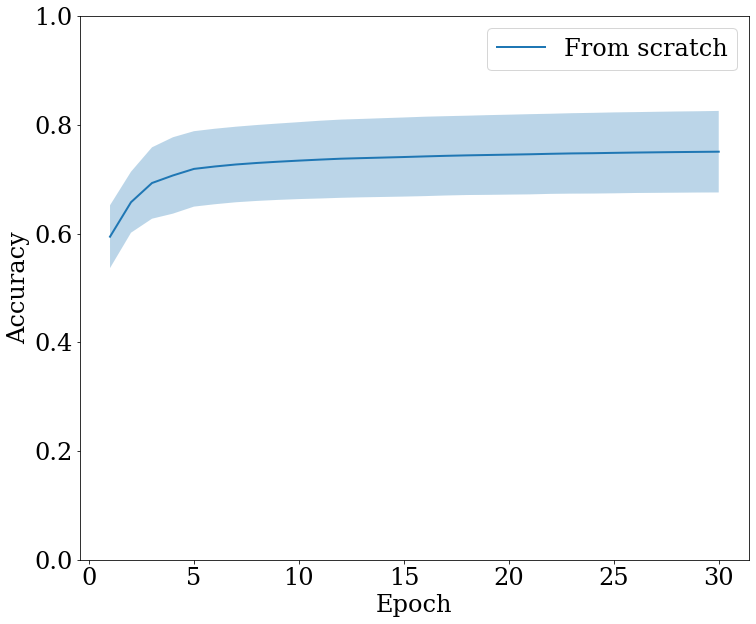

In [31]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.student_5_training_epochs+1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

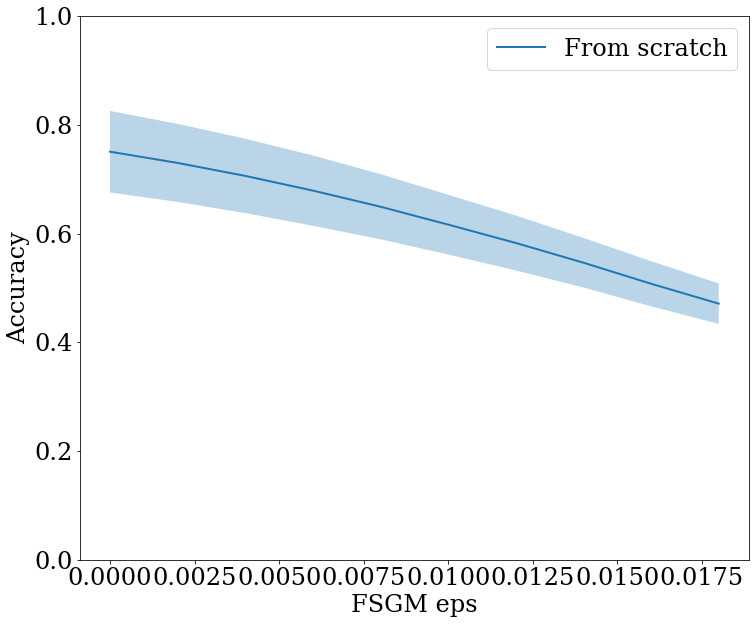

In [32]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

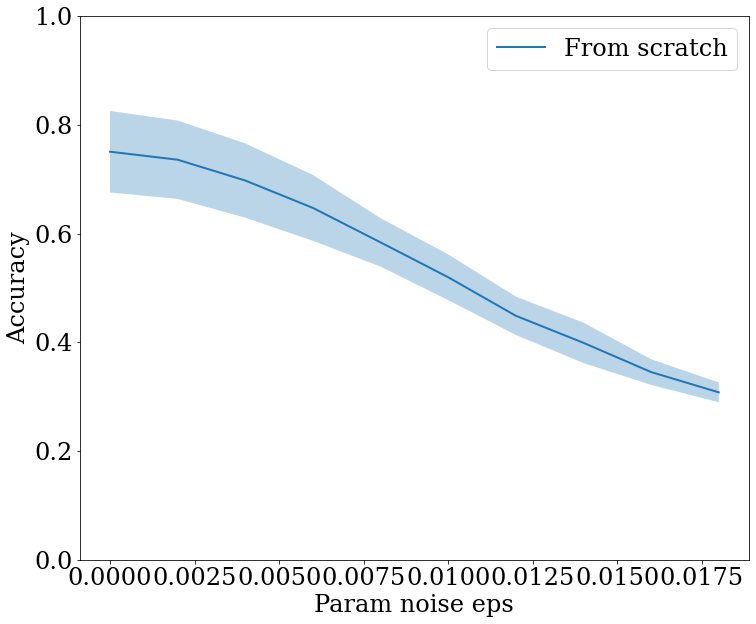

In [33]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [34]:
with open(pipeline.get_path()+'/history_5_n2n.json', 'w') as out:
    out.write(json.dumps(history))